In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
df=pd.read_csv('properties_cleaned.csv')

In [6]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,house,independent,sohna road road,6.25,6944.0,9001.0,Plot area 1000(836.13 sq.m.),3,3,0,not available,1.0,NaN,5 to 10 Year Old,"['Rajiv Chowk Mosque', 'Standard chartered ATM', 'Icici bank ATM', 'Samvit Health Care', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Medanta', 'Sukhmani Hospital Pvt. Ltd', 'Airforce Hospital', 'Park Hospital Gurgaon', 'Vishesh Dental', 'Neelkanth Health Care', 'Best Urologist Atcomplete Family Clinic', 'Wellness Eye Centre', 'Dr. Aruna Kalra', 'Bansal Medicare and Maternity Centre', 'Meher Clinic', 'Pushpanjali Hospital Gurgaon', 'Dispencery', 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Pushpanjali Hospital', 'Bones Clinic - Orthopaedics', 'Smile Plus Dental Clinic', 'Vaishnavi Nursing Home', 'Skin Clinic', 'Rajendra Hospital', 'Road and Traffic Authority', 'Gurgaon Election Commission', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Genius', 'India Oil', 'SRS Cinemas', 'SRS Cinemas', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'KFC', 'Haldiram', ""Domino's Pizza"", 'Darbar', ""Nirula's"", 'Kendriya Vidyalaya No.2 Sohna Road', 'Delhi Public School Primary Section', 'CR Model Public School', 'Manav Rachna School', 'Manav Rachna Swimming Pool']",[],NaN


# 1. areaWithType

In [7]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
349,0.42,654.0,Super Built up area 623(57.88 sq.m.)
25,2.99,2000.0,Super Built up area 2000(185.81 sq.m.)Built Up area: 1800 sq.ft. (167.23 sq.m.)Carpet area: 1500 sq.ft. (139.35 sq.m.)
1071,0.70,1224.0,Built Up area: 1224 (113.71 sq.m.)
789,0.22,523.0,Built Up area: 570 (52.95 sq.m.)Carpet area: 550 sq.ft. (51.1 sq.m.)
2196,5.80,4518.0,Plot area 502(419.74 sq.m.)


In [8]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [10]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [11]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [12]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2333,4.49,flat,3150.0,Carpet area: 350 (292.64 sq.m.),NaN,NaN,350.0
2183,1.10,flat,2035.0,Super Built up area 2035(189.06 sq.m.)Carpet area: 1760 sq.ft. (163.51 sq.m.),2035.0,NaN,1760.0
1704,1.10,flat,1928.0,Super Built up area 1928(179.12 sq.m.)Built Up area: 1580 sq.ft. (146.79 sq.m.)Carpet area: 1391 sq.ft. (129.23 sq.m.),1928.0,1580.0,1391.0
3701,0.95,flat,1445.0,Super Built up area 1445(134.24 sq.m.)Built Up area: 1300 sq.ft. (120.77 sq.m.)Carpet area: 1200 sq.ft. (111.48 sq.m.),1445.0,1300.0,1200.0
1715,0.74,house,1000.0,Built Up area: 1000 (92.9 sq.m.),NaN,1000.0,NaN


In [15]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [16]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,6.25,house,9001.0,Plot area 1000(836.13 sq.m.),NaN,NaN,NaN
4,1.70,house,2160.0,Plot area 240(200.67 sq.m.),NaN,NaN,NaN
7,0.95,house,1065.0,Plot area 1065(98.94 sq.m.),NaN,NaN,NaN
10,6.40,house,3150.0,Plot area 350(292.64 sq.m.)Built Up area: 349 sq.yards (291.81 sq.m.)Carpet area: 348 sq.yards (290.97 sq.m.),NaN,349.0,348.0
11,0.61,house,61.0,Plot area 61(5.67 sq.m.),NaN,NaN,NaN


In [17]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [18]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [19]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,6.25,house,9001.0,Plot area 1000(836.13 sq.m.),NaN,NaN,NaN
4,1.70,house,2160.0,Plot area 240(200.67 sq.m.),NaN,NaN,NaN
7,0.95,house,1065.0,Plot area 1065(98.94 sq.m.),NaN,NaN,NaN
11,0.61,house,61.0,Plot area 61(5.67 sq.m.),NaN,NaN,NaN
36,5.65,house,5400.0,Plot area 600(501.68 sq.m.),NaN,NaN,NaN


In [20]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [21]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [22]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [24]:
#all_nan_df

In [25]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [26]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [27]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,6.25,house,9001.0,Plot area 1000(836.13 sq.m.),NaN,9000.00,NaN
4,1.70,house,2160.0,Plot area 240(200.67 sq.m.),NaN,2160.00,NaN
7,0.95,house,1065.0,Plot area 1065(98.94 sq.m.),NaN,1065.00,NaN
11,0.61,house,61.0,Plot area 61(5.67 sq.m.),NaN,61.00,NaN
36,5.65,house,5400.0,Plot area 600(501.68 sq.m.),NaN,5400.00,NaN
48,7.50,house,2367.0,Plot area 215(179.77 sq.m.),NaN,2300.50,NaN
50,0.67,house,76.0,Plot area 76(7.06 sq.m.),NaN,76.00,NaN
54,6.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,6228.00,NaN
67,7.50,house,1935.0,Plot area 215(179.77 sq.m.),NaN,1935.00,NaN
71,16.00,house,4235.0,Plot area 500(418.06 sq.m.),NaN,500.00,NaN


In [28]:
# update the original dataframe
df.update(all_nan_df)

In [29]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [30]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,house,independent,sohna road road,6.25,6944.0,9001.0,Plot area 1000(836.13 sq.m.),3,3,0,not available,1.0,NaN,5 to 10 Year Old,"['Rajiv Chowk Mosque', 'Standard chartered ATM', 'Icici bank ATM', 'Samvit Health Care', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Medanta', 'Sukhmani Hospital Pvt. Ltd', 'Airforce Hospital', 'Park Hospital Gurgaon', 'Vishesh Dental', 'Neelkanth Health Care', 'Best Urologist Atcomplete Family Clinic', 'Wellness Eye Centre', 'Dr. Aruna Kalra', 'Bansal Medicare and Maternity Centre', 'Meher Clinic', 'Pushpanjali Hospital Gurgaon', 'Dispencery', 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Pushpanjali Hospital', 'Bones Clinic - Orthopaedics', 'Smile Plus Dental Clinic', 'Vaishnavi Nursing Home', 'Skin Clinic', 'Rajendra Hospital', 'Road and Traffic Authority', 'Gurgaon Election Commission', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Genius', 'India Oil', 'SRS Cinemas', 'SRS Cinemas', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'KFC', 'Haldiram', ""Domino's Pizza"", 'Darbar', ""Nirula's"", 'Kendriya Vidyalaya No.2 Sohna Road', 'Delhi Public School Primary Section', 'CR Model Public School', 'Manav Rachna School', 'Manav Rachna Swimming Pool']",[],NaN,NaN,9000.0,NaN
1,flat,indiabulls centrum park,sector 103,1.15,8679.0,1325.0,Super Built up area 1325(123.1 sq.m.)Carpet area: 865 sq.ft. (80.36 sq.m.),2,2,3,study room,10.0,North-East,1 to 5 Year Old,"['Gurgaon Dreamz Mall', 'HUDA Market, Sector 14', 'Dwarka Expressway', 'Delhi Gurgaon Expressway', 'S N International School', 'The NorthCap University', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Emaar Business Park', 'Country Inn and Suites by Radisson', 'Sector 29 Gurgaon Pubs and Bars', 'HUDA Mini Golf Course', 'Infinitys Badminton Academy', 'F9 Go Karting Gurgaon']","['2 Wardrobe', '1 Water Purifier', '3 Fan', '2 Geyser', '1 Stove', '8 Light', '2 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1325.0,NaN,865.0
2,flat,emaar gurgaon greens,sector 102,1.45,8787.0,1650.0,Super Built up area 1650(153.29 sq.m.)Built Up area: 1300 sq.ft. (120.77 sq.m.)Carpet area: 1100 sq.ft. (102.19 sq.m.),3,3,3,servant room,8.0,North-East,1 to 5 Year Old,"['JMS Marine Square Mall', 'Dwarka Expressway', 'Basai Road', 'Prime Scholars Int. School', 'DPG Institute of Technology', 'Vibrant Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'SkyJumper Trampoline Park', 'Ramgarh Farms & Resort']","['1 Chimney', '1 Modular Kitchen', '6 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1650.0,1300.0,1100.0
3,flat,ss the leaf,sector 85,1.05,6163.0,1704.0,Super Built up area 1671(

# 2. additionalRoom

In [31]:
df['additionalRoom'].value_counts()

not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,store room,study 

In [32]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [33]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
3349,others,0,0,0,0,1
1521,"study room,servant room",1,1,0,0,0
2971,others,0,0,0,0,1
2688,not available,0,0,0,0,0
2671,not available,0,0,0,0,0


In [34]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,independent,sohna road road,6.25,6944.0,9001.0,Plot area 1000(836.13 sq.m.),3,3,0,not available,1.0,NaN,5 to 10 Year Old,"['Rajiv Chowk Mosque', 'Standard chartered ATM', 'Icici bank ATM', 'Samvit Health Care', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Medanta', 'Sukhmani Hospital Pvt. Ltd', 'Airforce Hospital', 'Park Hospital Gurgaon', 'Vishesh Dental', 'Neelkanth Health Care', 'Best Urologist Atcomplete Family Clinic', 'Wellness Eye Centre', 'Dr. Aruna Kalra', 'Bansal Medicare and Maternity Centre', 'Meher Clinic', 'Pushpanjali Hospital Gurgaon', 'Dispencery', 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Pushpanjali Hospital', 'Bones Clinic - Orthopaedics', 'Smile Plus Dental Clinic', 'Vaishnavi Nursing Home', 'Skin Clinic', 'Rajendra Hospital', 'Road and Traffic Authority', 'Gurgaon Election Commission', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Genius', 'India Oil', 'SRS Cinemas', 'SRS Cinemas', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'KFC', 'Haldiram', ""Domino's Pizza"", 'Darbar', ""Nirula's"", 'Kendriya Vidyalaya No.2 Sohna Road', 'Delhi Public School Primary Section', 'CR Model Public School', 'Manav Rachna School', 'Manav Rachna Swimming Pool']",[],NaN,NaN,9000.0,NaN,0,0,0,0,0
1,flat,indiabulls centrum park,sector 103,1.15,8679.0,1325.0,Super Built up area 1325(123.1 sq.m.)Carpet area: 865 sq.ft. (80.36 sq.m.),2,2,3,study room,10.0,North-East,1 to 5 Year Old,"['Gurgaon Dreamz Mall', 'HUDA Market, Sector 14', 'Dwarka Expressway', 'Delhi Gurgaon Expressway', 'S N International School', 'The NorthCap University', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Emaar Business Park', 'Country Inn and Suites by Radisson', 'Sector 29 Gurgaon Pubs and Bars', 'HUDA Mini Golf Course', 'Infinitys Badminton Academy', 'F9 Go Karting Gurgaon']","['2 Wardrobe', '1 Water Purifier', '3 Fan', '2 Geyser', '1 Stove', '8 Light', '2 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1325.0,NaN,865.0,1,0,0,0,0
2,flat,emaar gurgaon greens,sector 102,1.45,8787.0,1650.0,Super Built up area 1650(153.29 sq.m.)Built Up area: 1300 sq.ft. (120.77 sq.m.)Carpet area: 1100 sq.ft. (102.19 sq.m.),3,3,3,servant room,8.0,North-East,1 to 5 Year Old,"['JMS Marine Square Mall', 'Dwarka Expressway', 'Basai Road', 'Prime Scholars Int. School', 'DPG Institute of Technology', 'Vibrant Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'SkyJumper Trampoline Park', 'Ramgarh Farms & Resort']","['1 Chimney', '1 Modular Kitchen', '6 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1650.0,1300.0,1100.0,

# 3.agePossession

In [37]:
df['agePossession'].value_counts()

1 to 5 Year Old        1676
5 to 10 Year Old        575
0 to 1 Year Old         530
undefined               332
10+ Year Old            310
Under Construction       90
Within 6 months          70
Within 3 months          26
2023-12-01 00:00:00      22
By 2023                  19
By 2024                  17
2024-12-01 00:00:00      16
2024-03-01 00:00:00      14
2024-10-01 00:00:00       8
2024-01-01 00:00:00       8
2025-12-01 00:00:00       7
2024-06-01 00:00:00       7
2023-08-01 00:00:00       7
2023-11-01 00:00:00       5
By 2025                   4
2024-08-01 00:00:00       4
2023-10-01 00:00:00       4
2024-07-01 00:00:00       4
2023-09-01 00:00:00       4
2025-01-01 00:00:00       3
2024-11-01 00:00:00       3
2024-02-01 00:00:00       3
2024-05-01 00:00:00       3
2027-07-01 00:00:00       2
2025-10-01 00:00:00       2
2026-12-01 00:00:00       2
2025-03-01 00:00:00       2
2027-06-01 00:00:00       2
2025-07-01 00:00:00       2
2025-08-01 00:00:00       2
2026-01-01 00:00:00 

In [38]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [39]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [40]:
df['agePossession'].value_counts()

Relatively New        1676
New Property           626
Moderately Old         575
Undefined              484
Old Property           310
Under Construction     132
Name: agePossession, dtype: int64

In [42]:
# df.head()

# 4.furnishDetails

In [44]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
2864,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Geyser', '1 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Water Storage', 'Park', 'Visitor Parking']"
503,"['1 Wardrobe', '1 Fan', '1 Light', '1 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN
2335,NaN,NaN
2435,[],"['Power Back-up', 'Lift(s)', 'Swimming Pool', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"
1649,"['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [45]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [46]:
furnishings_df.shape

(3803, 19)

In [48]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\YASH SHARMA\AppData\Local\Temp\ipykernel_9296\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [49]:
furnishings_df.sample(5)

,TV,Fan,Dining Table,Stove,Modular Kitchen,Fridge,Wardrobe,Microwave,Curtains,Light,Washing Machine,Bed,Sofa,AC,Geyser,Water Purifier,Exhaust Fan,Chimney
2587,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2217,0,5,0,0,1,0,2,0,1,6,0,0,0,0,2,1,1,0
1458,0,3,0,0,1,1,0,1,0,3,1,0,0,3,0,0,0,1
2330,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
421,0,0,0,0,1,0,0,0,0,0,0,0,0,5,4,0,0,1


In [50]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [52]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\YASH SHARMA\anaconda3\L

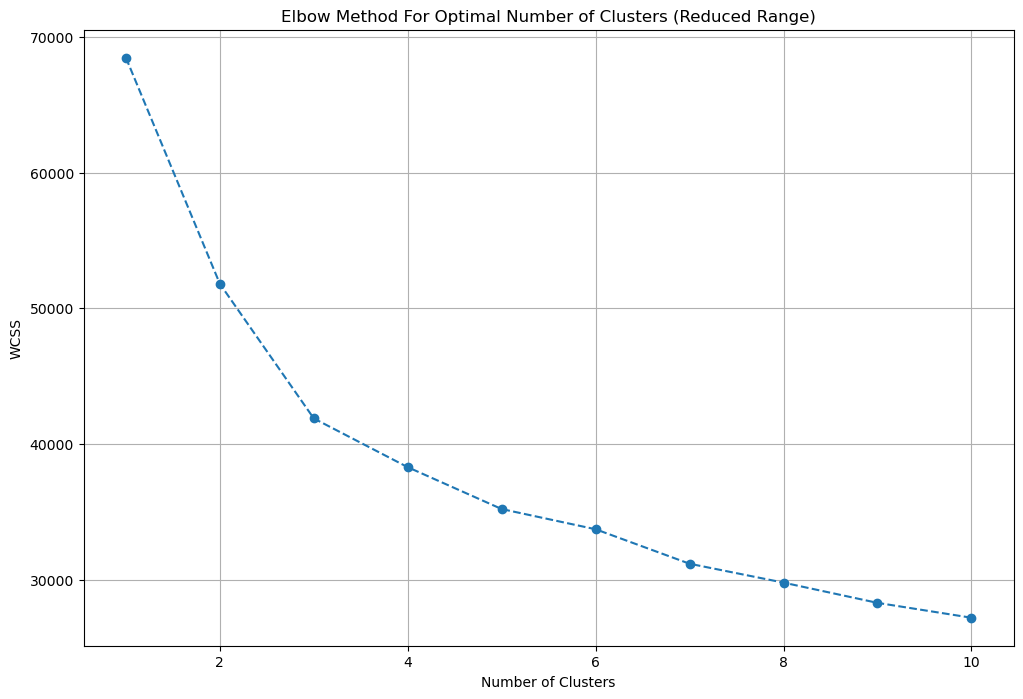

In [53]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [54]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

C:\Users\YASH SHARMA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
df = df.iloc[:,:-18]

In [58]:
#df.head()

In [59]:
df['furnishing_type'] = cluster_assignments

In [72]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> furnished
# 2 -> semifurnished

,furnishDetails,furnishing_type
1770,NaN,0
1565,"['4 Wardrobe', '5 Fan', '1 Exhaust Fan', '4 Geyser', '10 Light', '1 Curtains', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
433,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0
983,"['1 Fridge', '7 Fan', '1 Exhaust Fan', '1 Geyser', '1 Stove', '10 Light', '1 Curtains', '3 AC', '1 Modular Kitchen', '1 Chimney', '3 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Dining Table', 'No Sofa', 'No TV', 'No Water Purifier']",1
2663,NaN,0


# 5.features

In [74]:
df[['features']].sample(5)

,features
998,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']"
2047,"['Feng Shui / Vaastu Compliant', 'High Ceiling Height', 'Water Storage', 'Rain Water Harvesting']"
2194,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms']"
459,"['Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']"
1795,"['Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [75]:
df['features'].isnull().sum()

635

In [76]:
import pandas as pd
app_df = pd.read_excel('appartments.xlsx')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [77]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [78]:
temp_df = df[df['features'].isnull()]

In [79]:
temp_df.shape

(635, 26)

In [80]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [81]:
df.loc[temp_df.index,'features'] = x.values

In [82]:
df['features'].isnull().sum()

481

In [83]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [84]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [85]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
232,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2670,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
635,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
544,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
1502,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [87]:
df['luxury_score'] = luxury_score

In [88]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,house,independent,sohna road road,6.25,6944.0,9001.0,Plot area 1000(836.13 sq.m.),3,3,0,not available,1.0,NaN,Moderately Old,"['Rajiv Chowk Mosque', 'Standard chartered ATM', 'Icici bank ATM', 'Samvit Health Care', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Medanta', 'Sukhmani Hospital Pvt. Ltd', 'Airforce Hospital', 'Park Hospital Gurgaon', 'Vishesh Dental', 'Neelkanth Health Care', 'Best Urologist Atcomplete Family Clinic', 'Wellness Eye Centre', 'Dr. Aruna Kalra', 'Bansal Medicare and Maternity Centre', 'Meher Clinic', 'Pushpanjali Hospital Gurgaon', 'Dispencery', 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Pushpanjali Hospital', 'Bones Clinic - Orthopaedics', 'Smile Plus Dental Clinic', 'Vaishnavi Nursing Home', 'Skin Clinic', 'Rajendra Hospital', 'Road and Traffic Authority', 'Gurgaon Election Commission', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Genius', 'India Oil', 'SRS Cinemas', 'SRS Cinemas', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'KFC', 'Haldiram', ""Domino's Pizza"", 'Darbar', ""Nirula's"", 'Kendriya Vidyalaya No.2 Sohna Road', 'Delhi Public School Primary Section', 'CR Model Public School', 'Manav Rachna School', 'Manav Rachna Swimming Pool']",[],NaN,NaN,9000.0,NaN,0,0,0,0,0,0,[],0
1,flat,indiabulls centrum park,sector 103,1.15,8679.0,1325.0,Super Built up area 1325(123.1 sq.m.)Carpet area: 865 sq.ft. (80.36 sq.m.),2,2,3,study room,10.0,North-East,Relatively New,"['Gurgaon Dreamz Mall', 'HUDA Market, Sector 14', 'Dwarka Expressway', 'Delhi Gurgaon Expressway', 'S N International School', 'The NorthCap University', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Emaar Business Park', 'Country Inn and Suites by Radisson', 'Sector 29 Gurgaon Pubs and Bars', 'HUDA Mini Golf Course', 'Infinitys Badminton Academy', 'F9 Go Karting Gurgaon']","['2 Wardrobe', '1 Water Purifier', '3 Fan', '2 Geyser', '1 Stove', '8 Light', '2 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1325.0,NaN,865.0,1,0,0,0,0,2,"[Centrally Air Conditioned, Water purifier, Security / Fire Alarm, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Piped-gas, Internet/wi-fi connectivity, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",174
2,flat,emaar gurgaon greens,sector 102,1.45,8787.0,1650.0,Super Built up area 1650(153.29 sq.m.)Built Up area: 1300 sq.ft. (120.77 sq.m.)Carpet area: 1100 sq.ft. (102.19 sq.m.),3,3,3,servant room,8.0,North-East,Relatively New,"['JMS Ma

In [89]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [90]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3006,flat,ss the leaf,sector 83,1.19,7225.0,1647.0,Super Built up area 1640(152.36 sq.m.)Built Up area: 1630 sq.ft. (151.43 sq.m.)Carpet area: 1620 sq.ft. (150.5 sq.m.),2,2,3,4.0,South-East,Relatively New,1640.00,1630.00,1620.0,0,0,0,0,0,0,49
704,house,independent,sector 4,0.80,11852.0,675.0,Plot area 75(62.71 sq.m.),5,3,1,2.0,NaN,Moderately Old,NaN,675.00,NaN,0,0,0,0,0,0,0
1238,flat,vatika city,sector 49,2.65,11770.0,2251.0,Super Built up area 2251.42(209.16 sq.m.)Built Up area: 1750.75 sq.ft. (162.65 sq.m.),3,4,3,11.0,East,Moderately Old,2251.42,1750.75,NaN,0,1,0,1,0,2,140
3722,flat,satya element one,sector 49,0.87,19333.0,450.0,Carpet area: 450 (41.81 sq.m.),1,1,1,2.0,NaN,Relatively New,NaN,NaN,450.0,0,0,0,0,0,0,22
1533,flat,bptp terra,sector 37d,1.98,9036.0,2191.0,Super Built up area 2191(203.55 sq.m.),3,3,3+,12.0,North-East,New Property,2191.00,NaN,NaN,1,0,0,0,0,2,49


In [91]:
df.shape

(3803, 23)

In [92]:
df.to_csv('properties_cleaned_2.csv',index=False)